## Machine Learning and Statistics Module 52954
## Tasks
### Lecturer: Ian McLaughlin
### Student : Fiona O'Riordan
***

## Task 1
***

## Objective: 

October 5th, 2020: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library1 or otherwise. You should research the task first and include references and a description of your algorithm.

## Background

### Methods for calculating square roots are approximations.

Methods for calculating square roots seek to identify the non negative square root of a number (commonly denoted as √S, 2√S, or S1/2 ) of a real number [1]. Real numbers are any positive or negative number including all integers (whole positive or negative numbers or 0), rational(can be expressed as a fraction) and irrational numbers (can be expressed as an infinite decimal representation e.g. 3.1415926535....).  Real numbers which include decimal points are called floating point numbers, since the decimal "floats" between the digits [2].  Irrational numbers with infinite decimal representation are generally estimated by computers [2]. For most numbers their square root is an irrational number [1] Moreover, even in the case of computing the square root of a perfect square integer where a square root with an exact finite represenation exists, only a series of increasingly accurate approximations are returned. [1].


### Newtons Method.

Typically analytical methods to calcuate square roots tend to be iterative and have two steps. Firstly an initial guess $s$ of the square root is provided. This number can be any number as long as it is less that the number $x$ where √X is the number sought. Secondly, each iteration produces a better guess or is closer in refinement to the √X until a required accuracy is met or when a maximum number of iteratiions (predefined) have been reached for slowly converging algorithms. The closer this initial guess is to the √S then the less iterations will performed[1],[4].  

Newton's method is one such approach and will be used for this task as it the most widely used approach and the most suitable to computational [1],[4]. Newtowns method can be implemented to calculate the square root $s$ of a number $x$, where $x \gt 0$ and $s = \sqrt x $. Starting with an initial guess for the square root, $s_0$, the algorithm calculates a better guess using the formula
$$ s_{n+1} = s_n - \left ( \frac{s_n^2 - x}{2 s_n} \right ). $$
$s_{n}$ is the previous estimate for the square root and $s_{n+1}$ is the revised/updated appromiation.

Therefore, We can calculate the square root of a number using Newton's method [3, 4]. To find the square root $s$ of a number $x$, we can iterate using the following equation.
$$ s_{n+1} = s - \frac{s^2 - x}{2s} $$

 

## Implement the function.


In [ ]:
"""
A function to calculate the square root of a number.
"""
def sqrt(x):
   
    # define precision as number of decimal places to be used.
    precision = 10**-10;
    # Set the initial guess for the square root of s.
    s = x // 2
    # iteration number
    i = 1
    # Loop while the absolute difference between x and (s^2) is greater than the precision /accuracy required.
    while abs(x - (s **2)) > precision:
        # Calculate the next better guess for the square root.
        # first lets calculate the difference between current guess and next guess so that we can view.
        diff = (s*s - x) / (2 * s)
        s -= diff
        print("Loop:",i, "approximation",s, "difference from pervious value", diff)
        i += 1
    # Return the square root of x (approximation).
    return s


### Test the function


In [ ]:
myans = sqrt(2)
print("Square root of 2: ", myans)
num1 = sum(c.isdigit() for c in (str(myans)))
print("Number of decimal returned using Newton's square number is", sum(c.isdigit() for c in (str(myans))))

### Evalute the result

The functiona sqrt(2) only returns a value with only 17 significant digits displayed. As the Python documentation [6] explains and as we explored the earlier section above 'Methods for calculating square roots are approximations' computer languages use an approximation of certain numbers. In the case of Python that approximatiion is displayed to 17 significant decimal places [6].

According to Python documentation [6], floating point numbers are represented in base 2 (binary) fractions. Therefore for example 0.125 is represented as follows in decimal (base 10): 
0.125 = 1/10 + 2/100 + 5/1000
Similary the binary fraction 0.001 is represented as : 
0.001 = 0/2 + 0/4 + 1/8.

But mostly decimal fractions cannot be exactly expressed as a binary fraction. Therefore decimal floating-point numbers are **approximated** by the binary floating-point numbers actually stored by the computer[6]. 

Python documentation gives the example of 1/10 and explains how the decimal value 0.1 can never be represented exactly as a base 2 fraction regardless of the base 2 digits you use. The value 1/10 in base 2 is an infinitely repeating fraction: 
0.0001100110011001100110011001100110011001100110011...

While 1/10 will by default be displayed as 0.1, the actual stored value of 1/10 is the nearest representable binary fraction of that fraction.  If we format 0.1 to 100 places we see that number of signficant places calculated to in the approximation is 55.

In [ ]:
print(0.1) 
# print 0.1 and format to 100 decimal places
len(format((0.1), ".100f"))
mystring = "1000000000000000055511151231257827021181583404541015625"
len(mystring)

Python documentation [6] explains that floats are typically approximated using a binary fraction with the numerator using the first 53 bits starting with the most significant bit and with the denominator as a power of two. The binary fraction is 3602879701896397 / 2 ** 55

In [ ]:
3602879701896397 / 2 ** 55

So with this insight in mind, lets try to see if we can view the square root to 2 to 100 places. 

In [ ]:
# Print the result to 100 signification places.
print(format(myans, '.100f'))
 

In [ ]:
import re
num2 = len(re.sub("[^1-9]", "", (format(myans, '.100f'))))
#adding back in the one zero I shouldnt have removed but did for convenience.
print("Number of significant digits in my answer:", num2+1)

We see that 53 significant digits now as expected but this does not solve our question we were asked.


## Modify the approach.


However, if we use the python library 'decimal' and use its function 'sqrt' to calculate the square root of 2 with precision set to 100 we can see that python can be used to calculate the square root of 2 to 100 places. Therefore, it is possible to write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. 


In [ ]:
# https://docs.python.org/2/library/decimal.html [7]
from decimal import *
# set precision equal to 101 as precision refers to significant number of digits and not decimal places.
getcontext().prec = 101 
sqrt2byDecimal = Decimal(2).sqrt()
print(sqrt2byDecimal)
a = sqrt2byDecimal
print(type(a))

# https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python [8]
import re
numofdigits = len(re.sub("[^0-9]", "", str(sqrt2byDecimal)))
print("Number of signficant digits is ", numofdigits)


So the square root of 2 with 100 decimal places can be achieved using python. Stackoverflow [10] suggests just "multiply your number by 10**200 and use Newton's method to get the integer square root. Then insert a decimal point in the right place". In otherwords, this would return a number which is 100 decimal places from the square root of 2 and could be printed using the string format. 

In [ ]:

"""
A function to calculate the square root of 2.
"""
def sqrt2():
    x = 2*10**200
    # define precision as number of decimal places to be used.
    # precision = 10**-10;  No precision now as difference will be zero.
    # Set the initial guess for the square root of s.
    s = x // 2
    # iteration number
    i = 1
    # Loop while the absolute difference between x and (s^2) is greater than the precision /accuracy required.
    while (x - (s **2)) <0:
        # Calculate the next better guess for the square root.
        # first lets calculate the difference between current guess and next guess so that we can view.

#         s = s- (s*s - x) / (2 * s)
        #simplify in order to avoid overflow error.       
        s = (s+x//s)//2
    # Return the square root of 2 * 10**200
    s = (str(s))
    return(s[0] + "." + s[1:])
    
sqrt2()


This Python function called sqrt2 calculates and prints to the screen the square root of 2 to 100 decimal places.  Finally I am going to benchmark the result.





## Benchmark the Result


Compare to Nassa [9]: 

In [ ]:
# https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil [10]
sqrt2byNasa = "1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"
# check I have 100 decimal places places/ 101 significant places.
import re
# verify 100 decimal places
print("number of significant digits",len(str(sqrt2byNasa)[1:]))



In [ ]:
taskanswer = sqrt2()
if (str(sqrt2byNasa) == taskanswer):
    print("Square root of 2 to 100 decimal places is equal to Nasa's number with 100 decimal places displayed.")

## Conclusion

In [ ]:
Conclusion here... to do . 

### References: 
[1] Methods of computing square roots; Wikipedia;https://en.wikipedia.org/wiki/Methods_of_computing_square_roots  

[2] Real Number Definition; Techterms https://techterms.com/definition/realnumber  

[3] A Tour of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8  

[4] Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method  

[5] Geeks For Geeks; Find root of a number using Newton’s method; https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/  
[6] Python Software Foundation, "Floating Point Arithmetic: Issues and Limitations", https://docs.python.org/3/tutorial/floatingpoint.html
[7]decimal — Decimal fixed point and floating point arithmetic;Documentation » The Python Standard Library » Numeric and Mathematical Modules; Python.org »https://docs.python.org/3/library/decimal.html   
[8] How to count digits, letters, spaces for a string in Python? Óscar López Reply; Stackoverflow; https://stackoverflow.com/a/24878232  
[9] https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil  
[10] How to get the square root of a number to 100 decimal places without using any libaries or modules [; Stack Overflow;https://stackoverflow.com/questions/64295245/how-to-get-the-square-root-of-a-number-to-100-decimal-places-without-using-any-l



---

# Task 2

## Objective

November 2nd, 2020: The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

|              | A   | B   | C   | D   | Total |
|--------------|-----|-----|-----|-----|-------|
| White Collar | 90  | 60  | 104 | 95  | 349   |
| Blue Collar  | 30  | 50  | 51  | 20  | 151   |
| No Collar    | 30  | 40  | 45  | 35  | 150   |
| Total        | 150 | 150 | 200 | 150 | 650   |

## Background

###  The Chi Squared Test


The Chiq Squared test of independence tests for dependence between categorical variables.  The test is an omnibus test and therefore it tests "whether the explained variance in a set of data is significantly greater than the unexplained variance, overall".  In other words, the chi squared test test  whether distributions of categorical variables differ from each another.

The Chiq Squared test uses a cross tabulated table (as exemplifed in [4].) and analyses the independence between variables rows and columns.  


In theory, if the observed and expected were equal then chi-square would be zero but this is unlikeyly to happen in he real world. Determining whether a Chi Squared test statisic is sufficently large enough to state that a significant statistical difference is indicated is not that straightforward[3].


### Wikipedia example to be calculated 

Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification [1]. 

To estimate what proportion of the whole 1,000,000 live in neighborhood A, the sample number of 150 is used and similarly 349/650 is used to estimate the proportion of 1,000,0000 that are white collar workers [1]. 

As Wikipedia [1] explains, assuming independence under the hypothesis the  number of white-collar workers in neighborhood A to be: 
\begin{equation*} 
150 \times\frac{349}{650} \approx 80.54
\end{equation*}

Then in that "cell" of the table, we have

\begin{equation*}
\frac{(observed - expected)^2}{expected} =  
\frac{(90 - 80.54)^2}{80.54}
\approx 1.11
\end{equation*}

The sum of these quantities over all of the cells is the test statistic:
≈ 24.6 [1]
Under the null hypothesis, this sum has approximately a chi-squared distribution whose number of degrees of freedom:  
 =(rows -1) * (colums -1)  
 = (3-1) * (4-1)  
 = 2*3  
 = 6
 


 


#### Null Hypothesis (H0):

The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.

#### Alertnative Hypothesis H1):

The alternative hypothese is therefore a that person's neighborhood of residence is dependent on the person's occupational classification.

## VERIFY USING SCIPY.STATS

### Apply scipy.stats import chi2_contingency to the data

In [ ]:
# create a crosstab with each row of data.
crosstab = [[90, 60, 104, 95], [30,  50,  51, 20], [30,40,45,35]]


In [ ]:
# import the package scipy.stats chi2_contingency
from scipy.stats import chi2_contingency
# importing scip.stats itself
import scipy.stats as ss
# importing matplotlib for plotting.
import matplotlib.pyplot as plt
# setting a larger figure size. 
plt.rcParams['figure.figsize'] = (10.0, 8.0) 


In [ ]:
# perform the tests with outputs chisquare, p and dof
teststat, p, dof, expected = chi2_contingency(crosstab)

### Compare results


#### Compare 'cell': white-collar workers in neighbourhood A test statistic.

In [ ]:

print("As Wikipedia shows and scipy.stats concurs, assuming independence under the hypothesis the number of expected white-collar workers in neighborhood in the sample should be  :", expected[0][0],  
     "but the observed number is in the sample table is ", crosstab[0][0])
cell00stat = ((crosstab[0][0]- expected[0][0])**2)/expected[0][0]
print('As wikipedia shows and as we can deduce from scipy stats expected calculation the test statistic for this cell would be:%.2f'% (cell00stat))

#### Compare Chiq Square (sum of each test stat for each cell) result from Wikipedia with scipy.stats

In [ ]:
# chiq square test statistic.
print(f'Chi Squared Test Statistic from scipy.stats is %.1f (rounded to one decimal place)'%(teststat))
print(f'The teststat'%(teststat), 'is a summation of test stats for each of the cells')
print(f"""The testat {teststat} is a summation of test stats for each of the cells in the crosstab (e.g. for cell00 the test stat is{cell00stat:5.5f}).""")
# print the p value.
print('The p value = %.10f'% (p))
# print the Degrees of Freedom
print('The degrees of freedom value = %d'% (dof))
print('Table of Expected frequency values:', expected)

In [ ]:
# assume a alpha/critical value
alpha = 0.05
print('With p value of p=%.10f with alpha set to alpha=%.10f'% (p, alpha))
if p <= alpha:
    print("Reject the null hypothesis (H0)")
else:
    print('Results Do not reject (H0)')

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
# we can also use ss.chi2.ppf() to test the hypothesis using a critical value.
#  We had set alpha to be 0.5 and therefore will set the probability as 0.95.
prob = 0.95

# Percent point function (inverse of cdf — percentiles).
# Using chi2 ppf with probability of 0.95 and dof = 6, 
# we can calcuate the critical value of the test statistic
criticalvalue = ss.chi2.ppf(prob, dof)
print('With probability set to  %.2f, the critical value is calculated as %.4f, for stat %.4f'%
      (prob, criticalvalue, stat))

Since the critical value is less than the test stat then we need to reject the null hypothesis.

### Summary

1. The p value is 0.0004098425861096696 and is lower than alpha = 0.05 (an alpha value I have assumed to use here). There is a low probability that a persons neighbourhood is independent of the person's occupation. The Chi Squared test statistic is 24.6 approximately, an improbably large statistic according to the chi-squared distribution and less than the critical value when probability is set to 0.95.    Therefore reject null hypothesis that each person's neighborhood of residence is independent of the person's occupational classification.  
2. scipy.stats has been used to verify the wikipedia Chi-squared value of approximately 24.6. and calculate the associated p value of0.0004098426. 
3. Using scipy.stats chi square function the observed versus expected has been looked at and it has been noted and understood that with a p value of 0.0004098426 set against an assumed alpha value of 0.05, the null hypothesis (H0) has been rejected. The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.
4. The critical value with probability nominated as 0.95 (alpha 0.05) and degrees of freedom equal to 6 was calculated as 12.5916 approximately.  Again it is indicated that the null hypothesis should be reject as the chi squared value for this table was calculated as 24.5712 approximately which is less than the critical value.




### References

[1] Wikipedia contributors, “Chi-squared test — Wikipedia, the free encyclopedia,” 2020, [Online; accessed 1-November-2020]. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Chi-squaredtest&oldid=983024096  
[2] scipy.stats.chi2_contingency; Scipy Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html  
[3] Chi-Square Statistic: How to Calculate It / Distribution;Statistics How to; https://www.statisticshowto.com/probability-and-statistics/chi-square/


---

# Task 3

## Objective

November 16th, 2020: The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation
calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence.

## Background

### Standard Deviation

According to Wikipedia [1], Standard Deviation is "a measure of the amount of variation or dispersion of a set of values" or how spread out a set of data is.  A value set with a low standard deviation has values which tend to be close to the mean of the value set. In otherwords, the data is closely clustered around the mean[1].  In contrast a value set with a high standard deviation has values which tend to be further away from the mean of the value set [1]. The data is dispersed over a wider range of values.  Standard deviation is applied when the distribution of data is normal approximately resembling a bell curve[1]. 

Standard Deviation is used to understand if a specific value in a dataset is standard and thereby expected or if the value is unusual and therefore unexpected [1].  Standard devation is represented by the lower case greek symbol sigma $\sigma$.  A value's distance from the mean can be measured in terms of the number of standard deviations it is above or below the mean. A value which is beyond a specified number of Standard Deviations from the mean is said to be unusual or unexpected. This can used when determining if a result is "statisically significant" or alternatively part of "expected variance" [1].

"The standard deviation of a random variable, statistical population, data set, or probability distribution is the square root of its variance" [1].  The variance is the average of the squared differences of the values of the set from the value set mean [1]. As the Task desciption says the standard deviation of an array x can be calucated in numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).

The role of population and its role in the forumula itself will be expanded later. The 68-95-99.7 rule states that in a an approximately normal distribution about 68% of the data in data set will falls within one standard deviation of the mean, about 95% of the data will fall within 2 standard deviations of the mean and approximately 99.7% of the data will fall within 99.7% of the data [1].

Microsoft STDEV.P and Microsoft STDEV.S both caluculate standard deviation and these excel functions will now be explored.
 


## Microsoft STDEV.P versus Microsoft STDEV.S

The STDEV.P excel function estimates the standard deviation "based on an entire population"[3]. STDEV.P assumes the dataset represents the entire data set. The calculation used for standard deviation by STDEV.P is :
$${\sigma} = \sqrt{\frac{\sum(x - \mu)^2}{N}}$$

where 
∑sum means "sum of", 
x is a value in the data set, 
μ is the mean of the data set, and 
N is the number of data points in the population.

In contrast, the STDEV.S excel function "estimates standard deviation based on a sample"of the population[4]. The function assumes the dataset is a sample of the population and does not represent the entire population. 'The standard deviation is calculated using the "n-1" method [4].' The calulation used for STDEV.S is: 
$$ = \sqrt{\frac{\sum(x - \bar{x})^2}{n - 1}}$$


As we can see since the data is a sample from a larger population, the calcuation divides by one less than the number of data points in the sample, n-1 [3,4].  It should also be noted that in the STDEV.P calculation the mean $\mu$ is a mean of the entire population while in the calculation for STDEV.S the mean $\bar{x}$ is the mean for the sample population. This is important distinction since, as ... [5]explains, 


### Using numpy to show how STDEV.S is a better estimate for the SD of population when performed on a sample

Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 8)
import pandas as pd
import seaborn as sns

### Generate a random populations of integers with a normal distribution 


In [ ]:
# # generate a population with a uniform distribution
# mean, standard deviation, population size
mu, sigma, popsize = 50, 100, 1000  
pop = np.random.uniform(mu,sigma,popsize)

### View the distribution 

In [ ]:

# view the population distribution
fig = plt.hist(pop, bins=20)
# Add a title 
plt.title("Population Distribution", fontsize = 16)
plt.show()
  

In [ ]:

sns.distplot(pop, hist=False)

plt.show()

In [ ]:

popstd =np.std(pop)
popmean = np.mean(pop)
print(f"""For the randomly generated normal distribution of size {len(pop)}, the population has a Standard Deviation (SD) of 
{popstd:5.5f} and a mean of {popmean}.""")


### Generate a list of samplesizes

In [ ]:
# create an array of sample sizes.
samplesizes = [10,25,50,75, 100,150,200,300,500]
samplesizes

### Generate samples from the uniform population.

In [ ]:
# create an empty array to hold sample results.
sampleresults = []
# //for each samplesize  
for s in samplesizes:
#     create a sample from the population generated above, with sample size s and replace = False.
    sample =  np.random.choice(pop, size=s, replace=False)
#     Append the results to the array sampleresults including pop size, samplesize, sample mean, SDEV P, SDEV S.
    sampleresults.append([popsize, s, np.mean(sample), 
                          np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample)),
                          np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
                  ])

###  Insert into a dataframe & Calculate STDP % Difference & STDS % Difference

In [ ]:
# data = np.array(list(sampleresults))
df = pd.DataFrame(sampleresults, columns=["POP","SAMPLESIZE","SAMPLEMEAN","STDEVP", "STDEVS"])
df['POPSTD'] = popstd
#  adapted from https://stackoverflow.com/a/48867801
# calculate % difference between popstd and STD
df['STDP%DIFF'] = ((df['STDEVP'] - df['POPSTD']).abs())/df['POPSTD']
df['STDS%DIFF'] = ((df['STDEVS'] - df['POPSTD']).abs())/df['POPSTD']
# dfsorted = df.sort_values(by=['SAMPLESIZE'])
# dfsorted
df

### Initial Observations 

With a uniformally randomly generated population pop of size {len(pop)}, the population has a Standard Deviation (SD) of 14.857454. At a quick glance, with very small sample sizes of 10 and 15  the percentage difference between the population standard deviation (POPSTD) and the sample standard deviation using n (STDEV.P)is lower than the percentage difference between the population standard deviation  and the sample standard deviation using n-1 (STDEV.S).  However, for the remaining and increasingly larger sample sizes, the results show very marginal differences between the percentage difference between POPSTD and STDEV.S and the percentage difference between POPSTD and STDEV.P.



### Visualizing Initial Results

In [ ]:
# Ploting  results for standard deviation using STDEV.P & STDEV.P absolute difference between pop STD
# samplesize 
plt.plot(df['SAMPLESIZE'], df['STDP%DIFF'], 'bo', label='STDEVP')  
plt.plot(df['SAMPLESIZE'], df['STDS%DIFF'], 'gx', label='STDEVS')  
plt.title('Standard deviation ABS% Variation from POPSTD for each Sample Size', fontsize='16')
plt.xlabel('Sample Sizes', fontsize='14')
plt.ylabel('Absolute % Difference from Population STD', fontsize='14')
plt.legend()
plt.show()

As noted, the results show in general the percentage variation from the population standard deivation (POPSTD) is similar in STDEV.P and STDEV.S but I have two concerns here. The results show that STDEVP is actually closer than STDEVS to POPSTD on many occasions than STDEVS. So firstly the number of times we have tested the data is too limited. Therefore we need to increase the number of samples generated for each samplesize and the number of samplesizses. But before doing so, it would be valuable to address my second concern which is that I am looking at the % absolute difference. Looking at the table of results it does appear that STDEVP tends to be below POPSTD and STDEVS tends to be above for smaller sizes. Therefore before moving on to increasing the nubmer of tests, the POPSTD will be visualised against the STDEVP and STDEVS.

### Zooming in on Sample Standard Deviations (STDEV.S, STDEV.P) and Compariing against Population STD

In [ ]:
# Ploting  % diff results for standard deviation using STDEV.P & STDEV.P versus pop STD
# Adapted from https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.05-Multi-Line-Plots/
# using ax to learn more about it.
# samplesize 

fig, ax = plt.subplots()
ax.plot(df['SAMPLESIZE'], df['STDEVP'], 'bo', label='STDEVP')  
ax.plot(df['SAMPLESIZE'], df['STDEVS'], 'gx', label='STDEVS')  
# https://stackoverflow.com/a/33382750
ax.axhline(y= popstd, color='r', linestyle='-', label='POPSTD')
ax.set_title('Zooming in on Standard deviations for each Sample size', fontsize = 18)
ax.set_xlabel('Sample Sizes', fontsize= '14')
ax.set_ylabel('STD deviation', fontsize= '14')
ax.legend()
ax.axis([0, max(samplesizes)+5, 13.5, 18])
ax.xaxis.set_ticks(samplesizes)
ax.yaxis.set_ticks(np.arange(14, 18, 0.5))



Overall, we can see that STDEV.P tends to be smaller than STDEV.S. This is no wonder really as the calculations are identical except in the case of STDEV.P we divide by n whereas in STDEV.S we divide by n-1. Hence STDEV.S is larger. 

### INCREASE THE NUMBER OF SAMPLESIZES AND NUMBER OF SAMPLES TESTED

In [ ]:
# first increase the number of difference sample sizes used.

In [ ]:

# create an array of sample sizes.
samplesizes2 = [10,25,50,75, 100, 125,150,175,200,225,250,300,350,500,600,800]
samplesizes2



### Increasing the number of testcases for each samplesize.

Make life easier and create a function that can be resused (if needs be) to get stdevp, stdevs, mean for a popsize, testing each samplesize 100 times.

In [ ]:
sampleresults2 = []
# define a function to get stdevp, stdevs, mean for a popsize, testing each samplesize 100 times.
def getstds(pops):
     # create an empty array to hold sample results.
    # //for each samplesize  
    for s in samplesizes2:
        # repeat test for each sample 100 times.
        for i in range(0,100):
    #       create a sample from the population generated above, with sample size s and replace = False.
            sample =  np.random.choice(pops, size=s, replace=False)
    #       Append the results to the array sampleresults including pop size, samplesize, sample mean, SDEV P, SDEV S.
            sampleresults2.append([popsize, s, np.mean(sample), 
                          np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample)),
                          np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
                  ])
    

In [ ]:
# run the fuction on the populaton created earlier to get results from multiple samples from the same sample sizes
getstds(pop)

### Insert into a dataframe & Calculate STDP % Difference & STDS % Difference

In [ ]:
# data = np.array(list(sampleresults))
df2 = pd.DataFrame(sampleresults2, columns=["POP","SAMPLESIZE","SAMPLEMEAN","STDEVP", "STDEVS"])
df2['POPSTD'] = popstd
#  adapted from https://stackoverflow.com/a/48867801
# calculate % difference between popstd and STD
df2['STDP%DIFF'] = ((df2['STDEVP'] - df2['POPSTD']).abs())/df2['POPSTD']
df2['STDS%DIFF'] = ((df2['STDEVS'] - df2['POPSTD']).abs())/df2['POPSTD']

### Get the means for all of the results for each population-sample size.

In [ ]:


 
# print(df["STDPDIFF"].mean())
# print(df["STDSDIFF"].mean())
# # sns.scatterplot(data=df, x="STD", y="MEAN", hue="STDTYPE")
# # plt.plot(popstd,popmean, 'ro')
# # df 

# https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average
df2mean = df2.groupby(["POP",'SAMPLESIZE'], as_index= False).mean()
df2mean

### Visualize the results.

In [ ]:
# Ploting  results for standard deviation using STDEV.P & STDEV.P absolute difference between pop STD
# samplesize 
plt.plot(df2mean['SAMPLESIZE'], df2mean['STDP%DIFF'], 'bo', label='STDEVP')  
plt.plot(df2mean['SAMPLESIZE'], df2mean['STDS%DIFF'], 'gx', label='STDEVS')  
plt.title('MEAN Standard deviation ABS% Variation from POPSTD for each Sample Size', fontsize='16')
plt.xlabel('Sample Sizes', fontsize='14')
plt.ylabel('MEAN Absolute % Difference from Population STD', fontsize='14')
plt.legend()
plt.show()

On average, the % absolute difference between STDEV.S and POPSTD appears somewhat similar to the % absolute difference between STDEV.P and POPSTD to the naked eye. So therefore lets look at the actual average results closer again. Worth noting also, as expected, the averge % absolute difference from the STDEV.P and STDEV.S to the POPSTD gets smaller as the sample size gets closer to the actual population size.

### Zooming in on Sample Standard Deviations (STDEV.S, STDEV.P) and Compariing against Population STD

In [ ]:
# Ploting  % diff results for standard deviation using STDEV.P & STDEV.P versus pop STD
# Adapted from https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.05-Multi-Line-Plots/
# samplesize 
fig, ax = plt.subplots()
ax.plot(df2mean['SAMPLESIZE'], df2mean['STDEVP'], 'bo', label='STDEVP')  
ax.plot(df2mean['SAMPLESIZE'], df2mean['STDEVS'], 'gx', label='STDEVS')  
# https://stackoverflow.com/a/33382750
ax.axhline(y= popstd, color='r', linestyle='-', label='POPSTD')
ax.set_title('Zooming in on AVERAGE Standard deviations for each Sample size', fontsize = 18)
ax.set_xlabel('Sample Sizes', fontsize= '14')
ax.set_ylabel('AVERAGE STD deviation', fontsize= '14')
ax.legend()
ax.axis([0, max(samplesizes2)+5, 13.0,16.0])
ax.xaxis.set_ticks(samplesizes2)
ax.yaxis.set_ticks(np.arange(14, 16, 0.5))

### Review Results:

On average overall, the results in these sample test case sizes show that STDEV.P tends to yield a smaller standard deviation than STDEV.S. Moreover, the average STDEV.S yielded was nearer to the POPSTD in the majority of sample sizes. Therefore based on the results of this simulation, the  STDEV.S calculation would appear to be a better estimate for the standard deviation of a population when performed on a sample than STDEV.P. 

Before leaving this task it is worth noting the difference really seems obvious, consistent and more appropriate in the smaller sample sizes (excluding minute 10) ie <=100. Sample size 100 is 10% of the population. As the sample size get closer to the population size the usefulness of applying STDEV.S over STDEV.P seems to negate. Rightfully, when the a sample size is closer to the population size the mean of the sample is obivously more likely to be closer to the mean of the population.

In [ ]:
# Ploting  % diff results for standard deviation using STDEV.P & STDEV.P versus pop STD
# Adapted from https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.05-Multi-Line-Plots/
# samplesize 
fig, ax = plt.subplots()
ax.plot(df2mean['SAMPLESIZE'], df2mean['SAMPLEMEAN'], 'o-', label='STDEVP')   
# https://stackoverflow.com/a/33382750
ax.axhline(y= popmean, color='r', linestyle='-.', label='POPSTD')
ax.set_title('Zooming in on AVERAGE Standard deviations for each Sample size', fontsize = 18)
ax.set_xlabel('Sample Sizes', fontsize= '14')
ax.set_ylabel('AVERAGE STD deviation', fontsize= '14')
ax.legend()
ax.axis([0, max(samplesizes2), df2mean["SAMPLEMEAN"].min()-0.5, df2mean["SAMPLEMEAN"].max()+0.5])
ax.xaxis.set_ticks(samplesizes2)
ax.yaxis.set_ticks(np.arange(df2mean["SAMPLEMEAN"].min()-0.5, df2mean["SAMPLEMEAN"].max()+0.5, 0.5))



### Try varied population sizes.

In [ ]:
variedpopsizes = set(range(1000, 10000, 1000))
print(variedpopsizes)
# s = set(range(50, 500, 25))
samplesizeperc = set(range(10, 60, 10)) 
samplesizeperc

for s in variedpopsizes:
    print(s)

In [ ]:

#     for ssize in samplesizeperc:
#     # repeat test for each sample 100 times.
#         for i in range(0,10):
#             samplesize = (pops//100)*ssize
#             sample = np.random.choice(samplesize, pops)
#             mylist.append([pops,ssize, 
#                 np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample)),
#                 np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
#                   ])
#     return mylist


## References

[1] Wikipedia contributors, “Standard deviation” 2020, [Online; accessed 18-November-2020]. Available: https://en.wikipedia.org/wiki/Standard_deviation

[2] Khan Academy, "Calculating standard deviation step by step", 2020, [Online; accessed 18-November-2020].  Available:https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/a/calculating-standard-deviation-step-by-step

[3] Microsoft Support, 'STDEV.P function', undated,[Online; accessed 18-November-2020]. Available: https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285  
[4] Microsoft Support, 'STDEV.S function', undated,[Online; accessed 18-November-2020]. Available:
https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

# Task 4

## Objective

December 16th, 2020:Use scikit-learn to apply k Nearest Neighbours clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and
how accurate it might be, and then explain how your model could be used to make
predictions of species of iris.

### k Nearest Neighbours

The k-nearest neighbors (KNN) algorithm is a **supervised machine learning** algorithm that can be used to solve both classification and regression problems [2]. A supervised machine learing alogrithm, in contrast to a unsupervised learning algorthim, uses labeled input data to learn a function that can be used to solve class membership when given unlabeled data [1]. For the purposes of this exercise we will be deploying KNN to solve  classification of Iris data.  A classification has a discrete value as output.  This value is typically an integer value but importantly the values are just representational and therefore mathematical operations should not be applied on them.[1]



In KNN an observations are classified by their neighbours. k detemines the number of neighbours who vote to determine the class most common amoung its k nearest neighbours [1],[3]. KNN can be imagined as being underpinned by the idea that "birds of a feather flock together"[3]. In otherwords, ones nearest neighbours tend to be one of our own. Therefore, for an unclassifed new input, KNN locates k training examples closest to the new input and returns as output the majority classification [1],[3]. At its simplest, if k number of neighbours is set to 1 then the inputed object is assigned the class of that single nearest neighbor. KNN determines nearness by calculating the distance between data points using the Euclidean Distance formula (straight line distance) [1],[3]. In the Euclidean plane, let point ${\displaystyle p}$ have Cartesian coordinates ${\displaystyle (p_{1},p_{2})}$ and let point ${\displaystyle q}$ have coordinates ${\displaystyle (q_{1},q_{2})}$. Then the distance between ${\displaystyle p}$ and ${\displaystyle q}$ is given by [5]:

$$ = {\displaystyle d(p,q)={\sqrt {(p_{2}-p_{1})^{2}+(q_{1}-q_{2})^{2}}}.}$$ 

When determing the k number of closest neighbours to use two contrasting problems need to be considered. One, the if the k number is too small then KNN can 'overfit' classifying "just based on the closest neighbors instead of learning a good separating frontier between classes"[3]. Two, if the k number applied is too big then KNN may 'underfit' assuming that every point in the training set belongs to the majority class[3]. **Open Issue : How to avoid /minimize either of these traps**?

k-Nearest Neighbors (KNN) is a non-parametric learning algorithm[3]. In other words, in constrast to parametric learning algorithms that allow the discarding of training data after the model is built, KNN keeps all training in memory[3],[4].

The KNN Algorithm consists of the following steps[6]: 
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
* Calculate the distance between the input data and the current example from the data.
* Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. For classification, return the mode (the value that appears most frequently in the K entries) of the K labels  
 
    
    




### scikit-learn  k Nearest Neighbours


**Building a KNN model using scikit-learn**
To apply k Nearest neighbours using scikit-learn, first the data set will be loaded and then split.  The data will be split into a train set to train the model on labeled data and a test set to evaulate the models performance on unlabed data.  This method is commonly refered to as 'hold-out'. The size of the data sets is created is arbituary but typically the train set is larger than the test set.  The stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify[7]. In other words, spilting a sufficently large dataset will be probably perserve on average the class balance; with stratify, the class balance is perserved for sure. I am not sure which approach is more appropriate for this excercies. For the moment I am going to include stratisfy by iris species simply because I think a dataset of 150 observations to be split between train and test is a relatively small dataset especially when split. I would need more time to research and make a more informed decision.

Then the number of k nearest neighbours needs to me decided upon. To do this will be build a model for range of k values (2 to 20) and evaluate the accuracy before settling on a final model to use.  The data will be fit using the train data and their associated labels. The default weights = 'uniform' will be used. This will mean that all nearest neighbours have the same voting power i.e. the nearest neighbours contribute equally to the fit []

The accuracy score for each model will then be calucuated using sklearn metrics 




### Iris Data Set

### Explore the Dataset

Botantist Dr. E. Anderson collected the Iris data which Fisher then used in his 1936 Analysis [1]. The data set is a multivariate data set and has four variables/features/attributes for each flower picked. The four variables measured for each sample collected were:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm

The data set contains three classes with each class representing a type of Iris flower specie[1]. The first two species Iris setosa and Iris versicolor were found growing together [1], while the third specie, Iris Virginica separately was found separately [1]. For each class, 50 samples were collected. Therefore 150 separate observations were recorded and are included in the dataset.

In [24]:
# import initial libraries to be used.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [25]:
# Import the iris data set from seaborn

df = sns.load_dataset("iris")

In [26]:
# take a peek as they say.
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [27]:
# Confirm the dataset distribution of 50 of each specie using groupby and size:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [28]:
# Create a Statistical Summary for each specie
print(df.groupby('species').describe())

           sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                   

In [ ]:
# Visualize the dataset by specie.
plot = sns.pairplot(df,hue='species')
plt.suptitle("Visualize Iris Data Set: Histogram & Scatter with Species by Color", fontsize = 18)
# adjust the height of the title so it does not overlap the graph
plt.subplots_adjust(top=0.9)   
plt.show()

### Visual Observations of clusters.

The visualization shows the species Iris Setosa can be clearly separated from classes Iris Virginica and Iris Vertosa. The petal variables appear to be highly correlated. Separation of the three species appears to be most clearly distinguishable when petal_width and petal_length are the variables used.  See the scatter chart & histogram at the bottom left corner. 

### Implement sklearn KNN nearestest neighbour


In [2]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [261]:
# Reload the dataset using sklearn dataset so that I avoid having ValueError: could not convert string to float: 'versicolor'

iris = load_iris()



In [226]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [227]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [228]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [229]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split the data set into a train set and a test set. 

Setting the test size = 0.4. Stratify (ie peserving the data class balance) by species. using a random state to perserve outputs. 

In [283]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, stratify =y, random_state = 44)

In [284]:
# review the number of observations in each set.
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)

(90, 4)
(90,)
(60, 4)
(60,)


### Decide upon the best n_neighbours to use

In [285]:
# import sklearn metrics so that can apply metrics as described 
# in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn import metrics
# creating an objects with the k number of nearest neighbours ranging from 1 to 20  
krange = range(1,20)

# create an empty dict to store scores for each k value created.
knnscores = {}
# create an empyt list to store the scores list 
kscoreslist = []
accuracylist = []
for k in krange:
    # classify and in doing create knn object with k number of neighbours. 
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    #fit the inputs and outputs to the object knn 
    knn.fit(X_train, y_train)
#     // create predictions for X_test using the and record assign the predictions
    y_predict = knn.predict(X_test)
#     knnscores[k] = metrics.accuracy_score(y_test,y_predict)
    kscoreslist.append(metrics.accuracy_score(y_test, y_predict))
#     accuracylist.append((knn.predict(X_test) == y_test).sum())
print(knnscores)
print(kscoreslist)
# print(accuracylist)

{}
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.95, 0.9833333333333333, 0.95, 0.9666666666666667, 0.9166666666666666, 0.9333333333333333, 0.9166666666666666, 0.95]
[58, 58, 58, 58, 58, 58, 59, 59, 59, 58, 59, 57, 59, 57, 58, 55, 56, 55, 57]


### Visualize the Accuracy results

Text(0, 0.5, 'Testing Accuracy')

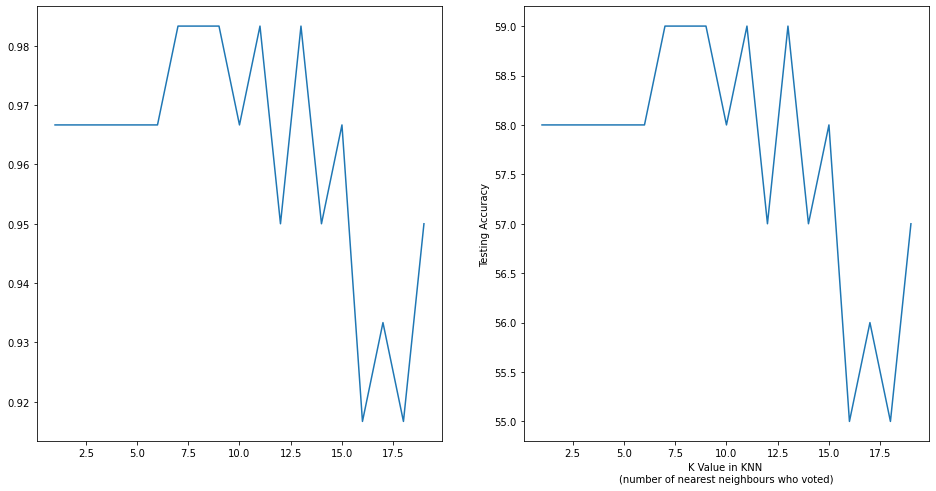

In [292]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].plot(krange, kscoreslist)
axes[1].plot(krange, accuracylist)
plt.xlabel("K Value in KNN \n(number of nearest neighbours who voted)")
plt.ylabel("Testing Accuracy")

In [272]:

# predict
knn.predict([[4.6, 2.3, 4.8, 1.0]])

array([1])

In [280]:
# evaluate
(knn.predict(X_test) == y_test).sum()

57

In [ ]:
)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

### Visual Evaluation

## References

[1] Fisher, R.A., "The Use of Multiple measurements in Taxonomic Problems", 1936 [Online; accessed 30-November-2020].http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf  

[2] k-nearest neighbors algorithm [Online; accessed 16-December-2020] https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm  

[3] Elhamraoui, Z, Medium.com, "Birds of a feather flock together (KNN)" [Online; accessed 16-December-2020] https://medium.com/@zahraelhamraoui1997/birds-of-a-feather-flock-together-knn-fae2fc089a5e  

[4] Brownlee, J., Machine Learning Algorithms "Parametric and Nonparametric Machine Learning Algorithms" [Online; accessed 16-December-2020]https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/  


[5] Wikipedia, "Euclidean distance" [Online; accessed 05-December-2020], https://en.wikipedia.org/wiki/Euclidean_distance  

[6] Harrison, O. "Machine Learning Basics with the K-Nearest Neighbors Algorithm" Towards Data Science, [Online; accessed 16-December-2020] https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761  

[7] Wikipedia, "Cross-validation (statistics)" [Online; accessed 16-December-2020] https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Holdout_method

[8] Fazzolini, Stackoverflow.com, Response to "Parameter “stratify” from method “train_test_split” (scikit Learn)" [Online; accessed 16-December-2020]https://stackoverflow.com/a/38889389

[9] Skikit Learn, "sklearn.neighbors.KNeighborsClassifier' https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[10] Skikit Learn, "sklearn.model_selection.train_test_split' [Online; accessed 17-December-2020] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[11],Skikit Learn"sklearn.metrics.accuracy_score",[Online; accessed 17-December-2020] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

 


## Footnotes